## Obtener un modelo de Red Neuronal Artificial para Clasificación

Datos: se proporciona un dataset con información crediticia de diferentes clientes en formato **csv**

Resultado: categorizar al cliente como **fiel** o no **fiel**

In [1]:
import numpy as np
import pandas as pd
import os
print('local dir: {}'.format(os.getcwd())) 
print(os.listdir(os.getcwd()))

local dir: /home/leninml/JuppyterLenno2/Curso_MachineLearning_Python_EPN2019_IEEE/MachineLearning
['cache', 'MachineLearning.ipynb', 'credit_card_data.csv', '.ipynb_checkpoints', 'images', 'ClasificationExample.ipynb']


Revisando el dataset

In [2]:
datos_df = pd.read_csv('credit_card_data.csv')
datos_df

,CUST_ID,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,FITNESS,EDUCATION,ENTERTAINMENT,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,LOYALTY
0,C10001,3044.993177,12,11.006688,0.000000,2168.506639,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2168.506639,1
1,C10002,81.927748,12,0.985254,0.000000,1779.354561,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1779.354561,0
2,C10003,1345.213562,12,2.830550,0.000000,0.000000,0.0,163.266045,0.0,1590.748309,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1754.014354,0
3,C10004,3193.925166,12,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
4,C10005,284.286718,7,11.757291,0.000000,189.991137,0.0,628.363089,0.0,0.000000,0.0,0.0,0.000000,29.831540,58.269684,61.882977,0.0,0.0,968.338427,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18966,C28967,433.941742,6,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
18967,C28968,745.654579,6,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
18968,C28969,244.651399,6,3.734193,0.000000,0.000000,0.0,0.000000,0.0,926.602407,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,926.602407,0
18969,C28970,395.937201,6,5.452103,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,564.666947,0.000000,0.0,0.0,564.666947,0


Existen algunas columnas que no tienen interés para el problema y que deben ser eliminadas

In [3]:
columnas = datos_df.columns
columnas

Index(['CUST_ID', 'AVG_BALANCE', 'TENURE', 'NUM_TRANS', 'ACCESSORIES',
       'APPLIANCES', 'CULTURE', 'GAS', 'BOOKS', 'APPAREL', 'FITNESS',
       'EDUCATION', 'ENTERTAINMENT', 'FOOD', 'HEALTH', 'HOME_GARDEN', 'TELCOS',
       'TRAVEL', 'PURCHASES_AMOUNT', 'LOYALTY'],
      dtype='object')

In [4]:
datos_df.dtypes

CUST_ID              object
AVG_BALANCE         float64
TENURE                int64
NUM_TRANS           float64
ACCESSORIES         float64
APPLIANCES          float64
CULTURE             float64
GAS                 float64
BOOKS               float64
APPAREL             float64
FITNESS             float64
EDUCATION           float64
ENTERTAINMENT       float64
FOOD                float64
HEALTH              float64
HOME_GARDEN         float64
TELCOS              float64
TRAVEL              float64
PURCHASES_AMOUNT    float64
LOYALTY               int64
dtype: object

In [5]:
datos_df2 = datos_df.drop(['CUST_ID'], axis=1)
datos_df2

,AVG_BALANCE,TENURE,NUM_TRANS,ACCESSORIES,APPLIANCES,CULTURE,GAS,BOOKS,APPAREL,FITNESS,EDUCATION,ENTERTAINMENT,FOOD,HEALTH,HOME_GARDEN,TELCOS,TRAVEL,PURCHASES_AMOUNT,LOYALTY
0,3044.993177,12,11.006688,0.000000,2168.506639,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2168.506639,1
1,81.927748,12,0.985254,0.000000,1779.354561,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1779.354561,0
2,1345.213562,12,2.830550,0.000000,0.000000,0.0,163.266045,0.0,1590.748309,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1754.014354,0
3,3193.925166,12,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
4,284.286718,7,11.757291,0.000000,189.991137,0.0,628.363089,0.0,0.000000,0.0,0.0,0.000000,29.831540,58.269684,61.882977,0.0,0.0,968.338427,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18966,433.941742,6,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
18967,745.654579,6,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
18968,244.651399,6,3.734193,0.000000,0.000000,0.0,0.000000,0.0,926.602407,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,926.602407,0
18969,395.937201,6,5.452103,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,564.666947,0.000000,0.0,0.0,564.666947,0


Generando el dataset como un numpy matrix

In [6]:
dataset_np = datos_df2.to_numpy()
dataset_np

array([[3.04499318e+03, 1.20000000e+01, 1.10066880e+01, ...,
        0.00000000e+00, 2.16850664e+03, 1.00000000e+00],
       [8.19277480e+01, 1.20000000e+01, 9.85254000e-01, ...,
        0.00000000e+00, 1.77935456e+03, 0.00000000e+00],
       [1.34521356e+03, 1.20000000e+01, 2.83055000e+00, ...,
        0.00000000e+00, 1.75401435e+03, 0.00000000e+00],
       ...,
       [2.44651399e+02, 6.00000000e+00, 3.73419300e+00, ...,
        0.00000000e+00, 9.26602407e+02, 0.00000000e+00],
       [3.95937201e+02, 6.00000000e+00, 5.45210300e+00, ...,
        0.00000000e+00, 5.64666947e+02, 0.00000000e+00],
       [3.90658988e+02, 6.00000000e+00, 2.19497230e+01, ...,
        0.00000000e+00, 1.16539110e+03, 0.00000000e+00]])

### Separando el feature vector y la etiqueta
Como se puede observar, la etiqueta ha sido suministrada en el dataset como **LOYALTY** y corresponde a la última columna

In [7]:
print('Shape del dataset: {}'.format(dataset_np.shape))
x = dataset_np[:,:-1]
y = dataset_np[:,-1]
print('Shape de X: {}'.format(x.shape))
print('Shape de Y: {}'.format(y.shape))

Shape del dataset: (18971, 19)
Shape de X: (18971, 18)
Shape de Y: (18971,)


In [8]:
print('X: {}'.format(x[0:5,:]))
print('Y: {}'.format(y[0:5]))

X: [[3.04499318e+03 1.20000000e+01 1.10066880e+01 0.00000000e+00
  2.16850664e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.16850664e+03]
 [8.19277480e+01 1.20000000e+01 9.85254000e-01 0.00000000e+00
  1.77935456e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.77935456e+03]
 [1.34521356e+03 1.20000000e+01 2.83055000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.63266045e+02 0.00000000e+00
  1.59074831e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.75401435e+03]
 [3.19392517e+03 1.20000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+0

### Separación de Datos en Entrenamiento y Testeo

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print('Shape de Xtrain: {}'.format(x_train.shape))
print('Shape de Ytrain: {}'.format(y_train.shape))
print('Shape de Xtest: {}'.format(x_test.shape))
print('Shape de Ytest: {}'.format(y_test.shape))

Shape de Xtrain: (15176, 18)
Shape de Ytrain: (15176,)
Shape de Xtest: (3795, 18)
Shape de Ytest: (3795,)


### Pre-Procesamiento de Datos
Como se puede ver los datos de cada columna están en escalas diferentes. Podemos mejorar el procesamiento, realizando el escalado de datos. En esta parte escalaremos los datos de **xtrain**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.fit(x_train))
print(scaler.mean_)
x_train = scaler.transform(x_train)
print('data escalada: \n{}'.format(x_train[0:2,0:3]))


StandardScaler()
[2258.17868886   11.39397733   19.11894104  177.49820889  216.42087936
    5.81539031  105.02836715   32.32719661  482.58982614    3.0657289
    8.67284774  118.26537457  185.26428228   96.43617634  116.92544899
  160.77144645  182.1609695  1891.24214322]
data escalada: 
[[-0.38730608  0.41591898 -0.54722724]
 [ 2.74666294  0.41591898  3.73099803]]


### Clasificación con Redes Neuronales Artificiales

1. Determine un número de neuronas de capa oculta
2. Escoga un algoritmo de optimización
3. Una función de activación para la última neurona

Sugerencia, prueba con 6 neuronas en la capa oculta y luego sube ese valor a 60

In [11]:
from sklearn.neural_network import MLPClassifier
red = MLPClassifier(hidden_layer_sizes = 60, 
                    learning_rate_init=0.01, 
                    solver='sgd',
                    momentum=0.6,
                    max_iter=150,
                    shuffle=True,
                    activation="logistic",
                    verbose=True)
red.fit(x_train, y_train)

Iteration 1, loss = 0.58203557
Iteration 2, loss = 0.56300567
Iteration 3, loss = 0.54372886
Iteration 4, loss = 0.52324130
Iteration 5, loss = 0.50139180
Iteration 6, loss = 0.47800762
Iteration 7, loss = 0.45391631
Iteration 8, loss = 0.42984523
Iteration 9, loss = 0.40660691
Iteration 10, loss = 0.38478672
Iteration 11, loss = 0.36482373
Iteration 12, loss = 0.34689015
Iteration 13, loss = 0.33095450
Iteration 14, loss = 0.31678169
Iteration 15, loss = 0.30429165
Iteration 16, loss = 0.29327878
Iteration 17, loss = 0.28347469
Iteration 18, loss = 0.27474523
Iteration 19, loss = 0.26692049
Iteration 20, loss = 0.25996159
Iteration 21, loss = 0.25365816
Iteration 22, loss = 0.24787616
Iteration 23, loss = 0.24259164
Iteration 24, loss = 0.23780458
Iteration 25, loss = 0.23335368
Iteration 26, loss = 0.22916659
Iteration 27, loss = 0.22529655
Iteration 28, loss = 0.22168844
Iteration 29, loss = 0.21828658
Iteration 30, loss = 0.21509351
Iteration 31, loss = 0.21205550
Iteration 32, los

/home/leninml/anaconda3/envs/tfv2Cuda10.1/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=60,
              learning_rate_init=0.01, max_iter=150, momentum=0.6, solver='sgd',
              verbose=True)

### Rendimiento del Entrenamiento
Para evaluar el rendimiento en el entrenamiento se puede usar el método *score* en el objeto red neuronal

In [12]:
red.score(x_train, y_train)

0.9729836584080126

Para evaluar el desempeño real de la red neuronal en el dataset de pruebas, se debe realizar las predicciones con el modelo entrenado. Desde luego, se debe normalizar también el conjunto de datos de testeo

In [13]:
x_test = scaler.transform(x_test)
y_predict = red.predict(x_test)
y_predict

array([1., 0., 0., ..., 0., 0., 1.])

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_true=y_test, y_pred=y_predict)


array([[2726,   34],
       [  88,  947]])

In [15]:
cm = confusion_matrix(y_true=y_test, y_pred=y_predict, labels=[0, 1])
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
print('TN: {}, FP:{}\nFN:{}, TP:{}'.format(TN, FP, FN, TP))
print('Accuracy: {}'.format((TP+TN)/(TP+TN+FP+FN)))

TN: 2726, FP:34
FN:88, TP:947
Accuracy: 0.9678524374176548


In [16]:
red.score(x_test, y_test)

0.9678524374176548

In [17]:
print(classification_report(y_true=y_test, y_pred=y_predict, target_names=['leal', 'no-leal']))


              precision    recall  f1-score   support

        leal       0.97      0.99      0.98      2760
     no-leal       0.97      0.91      0.94      1035

    accuracy                           0.97      3795
   macro avg       0.97      0.95      0.96      3795
weighted avg       0.97      0.97      0.97      3795



In [18]:
y_test_class = ['leal' if i==1 else 'no-leal' for i in y_test]
print(y_test_class[:5])
print(y_test[:5])

['leal', 'no-leal', 'no-leal', 'no-leal', 'no-leal']
[1. 0. 0. 0. 0.]


In [19]:
y_predict_class = ['leal' if i==1 else 'no-leal' for i in y_predict]
print(y_predict_class[:5])
print(y_predict[:5])

['leal', 'no-leal', 'no-leal', 'no-leal', 'no-leal']
[1. 0. 0. 0. 0.]


## Solución con Redes Neuronales Convolucionales

Las redes neuronales convolucionales tienen una arquitectura más compleja que las redes neuronales artificiales y son ideales para trabajar con **datos multidimensionales** a través de **tensores**. Existen operaciones como: convolución, max pooling, entre otras. Para emular una ANN con ConvNet sólo usaremos layers de tipo dense

Es necesario a **Xtrain** ponerlo en formato de tensor (i.e. (samples, features))

In [20]:
num_ejemplos, features = x_train.shape
print(num_ejemplos, features)

15176 18


In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
red_convnet = models.Sequential()
red_convnet.add(layers.Dense(10, activation='relu', input_shape=(features,)))
red_convnet.add(layers.Dense(6, activation='relu'))
red_convnet.add(layers.Dense(1, activation='sigmoid'))

red_convnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.optimizers import RMSprop
red_convnet.compile(optimizer=RMSprop(lr=0.1), 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])
history = red_convnet.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2)


Epoch 1/10
380/380 [==============================] - 17s 44ms/step - loss: 0.0915 - accuracy: 0.9703 - val_loss: 0.0334 - val_accuracy: 0.9891
Epoch 2/10
380/380 [==============================] - 18s 47ms/step - loss: 0.0434 - accuracy: 0.9881 - val_loss: 0.0199 - val_accuracy: 0.9934
Epoch 3/10
380/380 [==============================] - 19s 51ms/step - loss: 0.0641 - accuracy: 0.9886 - val_loss: 0.0404 - val_accuracy: 0.9934
Epoch 4/10
380/380 [==============================] - 19s 50ms/step - loss: 0.0911 - accuracy: 0.9903 - val_loss: 0.0406 - val_accuracy: 0.9822
Epoch 5/10
380/380 [==============================] - 20s 54ms/step - loss: 0.0829 - accuracy: 0.9908 - val_loss: 0.1694 - val_accuracy: 0.9951
Epoch 6/10
380/380 [==============================] - 19s 50ms/step - loss: 0.0625 - accuracy: 0.9941 - val_loss: 0.0507 - val_accuracy: 0.9941
Epoch 7/10
380/380 [==============================] - 18s 48ms/step - loss: 0.0719 - accuracy: 0.9942 - val_loss: 0.0201 - val_accuracy:

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy')

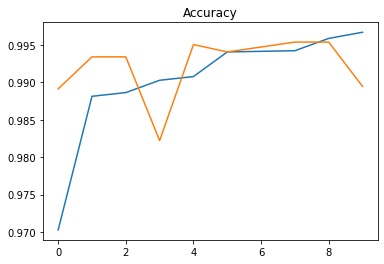

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Model Loss')

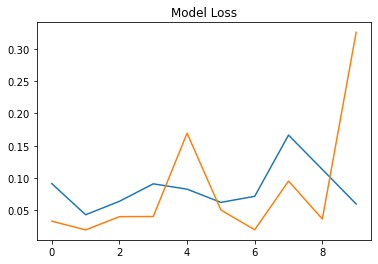

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')